## Decision Tree & Random Forest


### Question_1

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("preprocessed_data.csv")

In [3]:
data.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,0,2,1,28.0,13.0000,2,3,0
1,1,0,3,1,25.0,7.6500,2,3,0
2,2,0,3,1,20.0,7.8542,2,3,0
3,3,0,3,0,29.0,21.0750,2,3,4
4,4,0,1,1,31.0,52.0000,2,3,1


In [4]:
X = data[['Pclass', "Sex", "Age", "Fare", "Embarked" ,"Title", "FamilySize"]]
Y = data["Survived"]

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 30)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [7]:
model = tree.DecisionTreeClassifier(max_leaf_nodes=5,max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5)

In [8]:
print('the accuracy of the Decision tree for 5 leaf nodes and a depth of 3 is: \n' + repr(accuracy_score(y_test,model.predict(x_test))))

the accuracy of the Decision tree for 5 leaf nodes and a depth of 3 is: 
0.7597765363128491


### Question_2

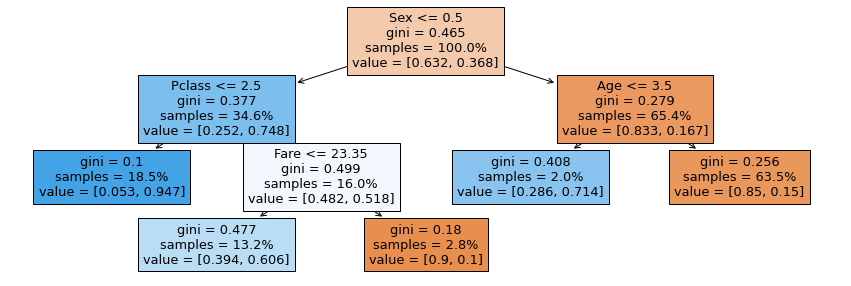

In [9]:
plt.figure(figsize = (15,5))
plot_tree(model,feature_names = X.columns, filled=True,proportion=True)
plt.show()

#### A prediction of a survived person can be done while going through the different branches of our decision tree.
#### we can predict that a female (sex = 0) where sex <= 0.5 ,a Pclass > 2.5 (poor class) and a fare > 23.35 would die ( probability to be a not survived is 0.9) 
#### we can predict that a male (sex = 1) with an ag <= 3.5 would survive, otherwise, he would die.
#### we can predict that a female (sex=0) with a Pclass <= 2.5 would survive.

### Question_3

In [10]:
model_1 = tree.DecisionTreeClassifier( criterion = "entropy", splitter='random',min_samples_split = 7)
model_1.fit(x_train,y_train)
print('the accuracy of the Decision tree is: \n' + repr(accuracy_score(y_test,model_1.predict(x_test))))

the accuracy of the Decision tree is: 
0.7988826815642458


### Question_4

#### When modifying some parameters , such the criterion from best to entropy and the splitter from best to random, the accuracy was increased from 0.75 to 0.81 .

### Question_5

In [11]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics

In [12]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)
print('Accuracy using RandomForest with 100 n_estimators ' + repr(accuracy_score(y_predict, y_test)))

Accuracy using RandomForest with 100 n_estimators 0.8100558659217877


In [15]:
clf = RandomForestClassifier(n_estimators= 10)
clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)
print('Accuracy using RandomForest with 10 n_estimators ' + repr(accuracy_score(y_predict, y_test)))

Accuracy using RandomForest with 10 n_estimators 0.7877094972067039


#### When using more estimators, the accuracy of the random forest increased.